In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [117]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [118]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# From the above dataset I can see that bmi column has some null values, So i need to remove. For doing that I have calculated individual null mean values based on gender grouping and replaced them.

In [119]:
df['bmi']=='Other'

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [120]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [121]:
df['bmi'].isnull().sum()

201

In [122]:
df.groupby(by='gender')['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Name: bmi, dtype: float64

In [123]:
for i in df['gender']:
  if i=='Female':
    df['bmi'].fillna(29.06,inplace=True)
  elif i=='Male':
    df['bmi'].fillna(28.64,inplace=True)
  else:
    df['bmi'].fillna(22.40,inplace=True)


# Graph representing which gender is most affected by stroke

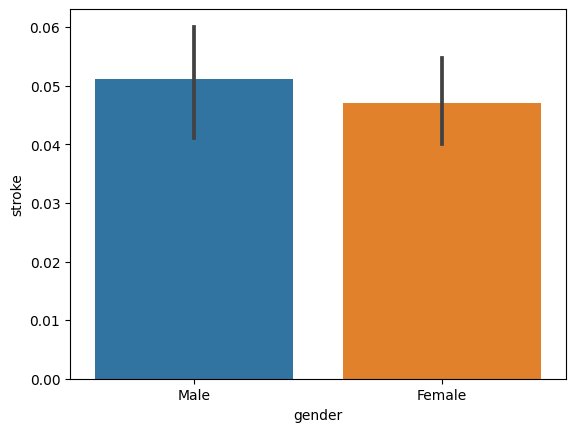

In [124]:
sns.barplot(x='gender',y='stroke',data=df)
plt.show()

In [125]:
df1=df.drop(['id'], axis=1)

<ipython-input-126-b24b391bb252>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot = True)


<Axes: >

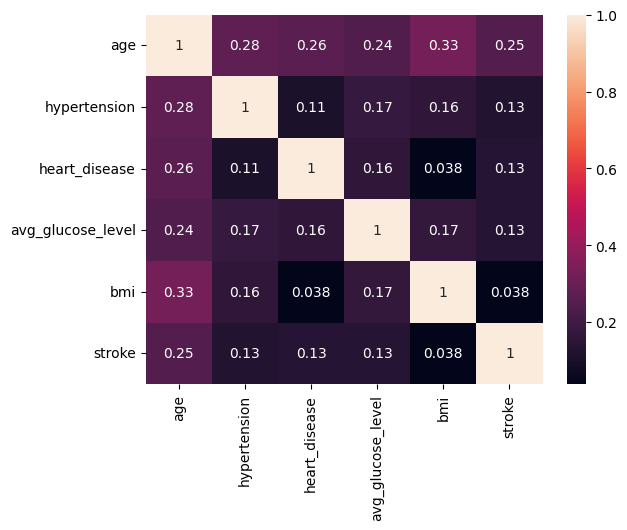

In [126]:
sns.heatmap(df1.corr(), annot = True)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

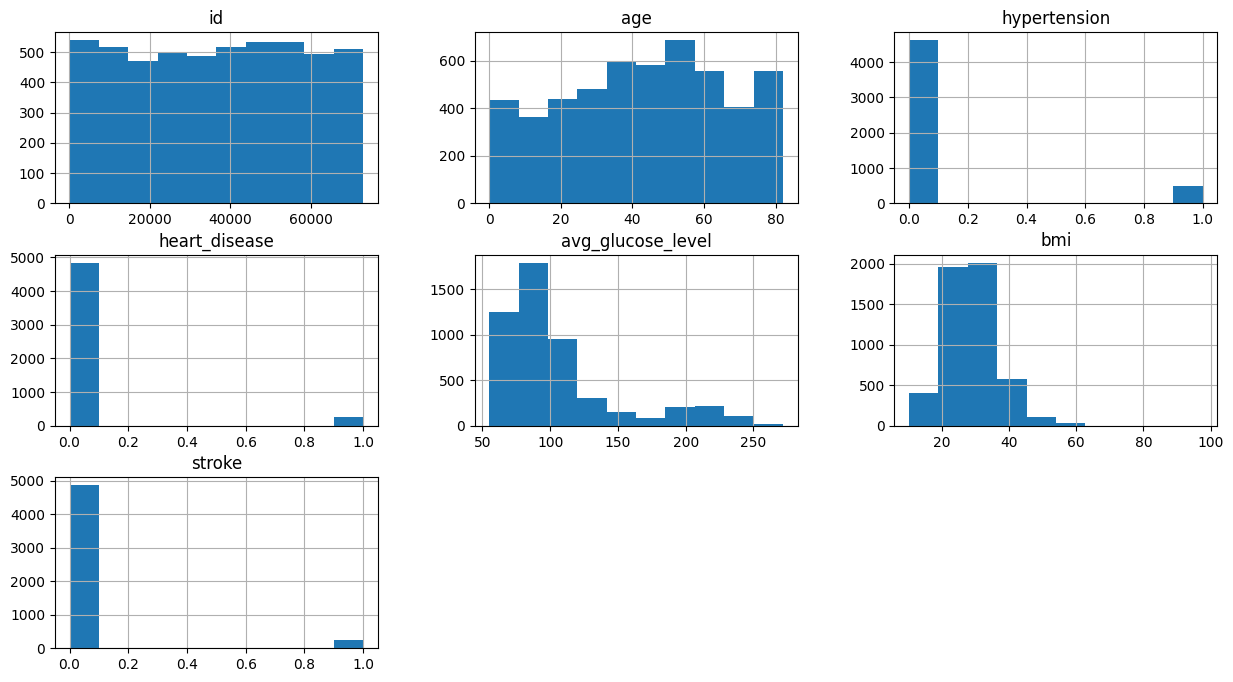

In [127]:
df.hist(figsize=(15,8))

<Axes: xlabel='age', ylabel='bmi'>

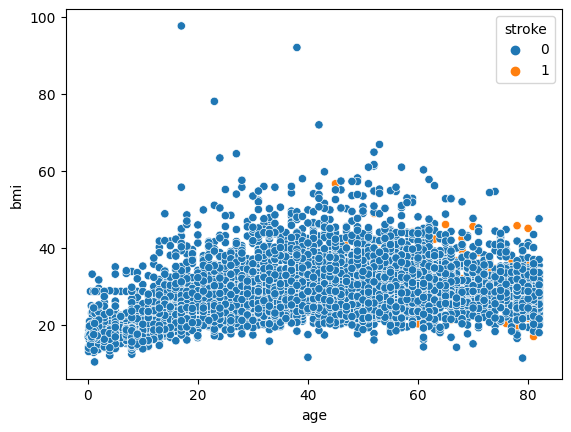

In [128]:
sns.scatterplot(x='age',y='bmi',hue='stroke',data=df)

In [129]:
df["metabolic_health"] = df["avg_glucose_level"]/df["bmi"]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,metabolic_health
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,6.248361
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.64,never smoked,1,7.060405
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,3.259077
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,4.977616
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,7.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.64,never smoked,0,2.924232
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,3.130000
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,2.712092
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,6.495703


In [130]:
import pandas as pd

# Convert 'metabolic_health' column to numeric type, ignore non-numeric values
df['metabolic_health'] = pd.to_numeric(df['metabolic_health'], errors='coerce')

# Define the bin edges and labels
bin_edges = [df['metabolic_health'].min()-1, 5, 10, df['metabolic_health'].max() + 1]
labels = ['Low', 'Moderate', 'High']

# Create a new column with categorical bins, replacing non-numeric values with 'Missing'
df['metabolic_health_category'] = pd.cut(df['metabolic_health'], bins=bin_edges, labels=labels, right=False, include_lowest=True)


<Axes: xlabel='metabolic_health_category', ylabel='stroke'>

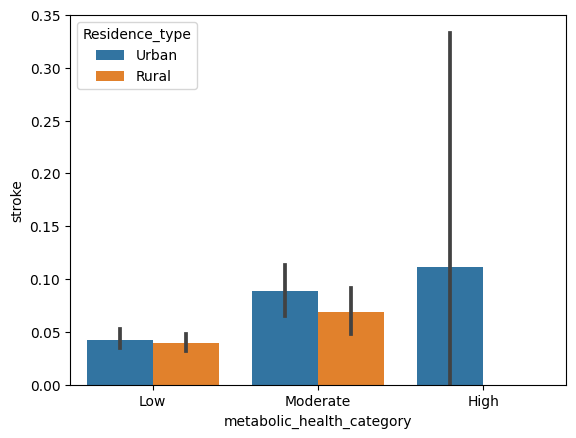

In [131]:
sns.barplot(y='stroke',x='metabolic_health_category',hue='Residence_type',data=df)

<Axes: xlabel='work_type', ylabel='stroke'>

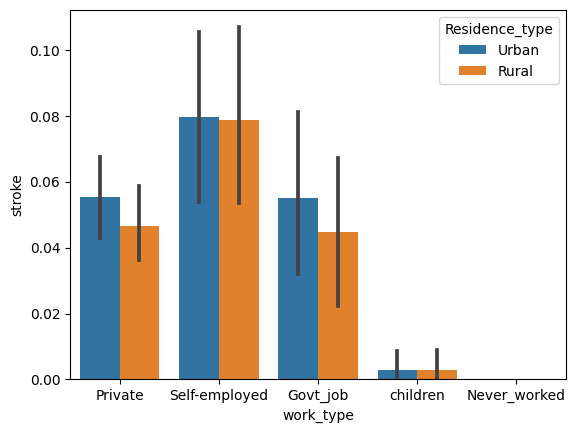

In [132]:
sns.barplot(y='stroke',x='work_type',hue='Residence_type',data=df)

In [133]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,metabolic_health,metabolic_health_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,6.248361,Moderate
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.64,never smoked,1,7.060405,Moderate
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,3.259077,Low
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,4.977616,Low
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,7.255000,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.64,never smoked,0,2.924232,Low
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,3.130000,Low
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,2.712092,Low
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,6.495703,Moderate


In [134]:
df['gender'].replace(['Male', 'Female'],[0, 1], inplace=True)

In [135]:
df['ever_married'].replace(['Yes','No'],[1,0],inplace=True)

In [136]:
df['work_type'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],[0,1,2,3,4],inplace=True)

In [137]:
df['Residence_type'].replace(['Urban','Rural'],[1,0],inplace=True)
df['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'],[0,1,2,3],inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,metabolic_health,metabolic_health_category
0,9046,0,67.0,0,1,1,0,1,228.69,36.60,0,1,6.248361,Moderate
1,51676,1,61.0,0,0,1,1,0,202.21,28.64,1,1,7.060405,Moderate
2,31112,0,80.0,0,1,1,0,0,105.92,32.50,1,1,3.259077,Low
3,60182,1,49.0,0,0,1,0,1,171.23,34.40,2,1,4.977616,Low
4,1665,1,79.0,1,0,1,1,0,174.12,24.00,1,1,7.255000,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,1,83.75,28.64,1,0,2.924232,Low
5106,44873,1,81.0,0,0,1,1,1,125.20,40.00,1,0,3.130000,Low
5107,19723,1,35.0,0,0,1,1,0,82.99,30.60,1,0,2.712092,Low
5108,37544,0,51.0,0,0,1,0,0,166.29,25.60,0,0,6.495703,Moderate


In [138]:
df.drop(['metabolic_health_category'],axis=1,inplace=True)

In [139]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,metabolic_health
0,9046,0,67.0,0,1,1,0,1,228.69,36.60,0,1,6.248361
1,51676,1,61.0,0,0,1,1,0,202.21,28.64,1,1,7.060405
2,31112,0,80.0,0,1,1,0,0,105.92,32.50,1,1,3.259077
3,60182,1,49.0,0,0,1,0,1,171.23,34.40,2,1,4.977616
4,1665,1,79.0,1,0,1,1,0,174.12,24.00,1,1,7.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,1,83.75,28.64,1,0,2.924232
5106,44873,1,81.0,0,0,1,1,1,125.20,40.00,1,0,3.130000
5107,19723,1,35.0,0,0,1,1,0,82.99,30.60,1,0,2.712092
5108,37544,0,51.0,0,0,1,0,0,166.29,25.60,0,0,6.495703


In [140]:
#given values to variables X and y for converting into training and testing data
from sklearn.model_selection import train_test_split
y=df['stroke']
X=df.drop('stroke',axis=1)


In [141]:
#splitted the data, here 80% of the data is under training and 20% is testing
#random state controls the shuffling process
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=100)

In [142]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [143]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


In [144]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
lr_train_accuracy=accuracy_score(y_train,y_train_pred)
lr_train_r2=r2_score(y_train,y_train_pred)
lr_train_mse=mean_squared_error(y_train,y_train_pred)
lr_test_r2=r2_score(y_test,y_test_pred)
lr_test_mse=mean_squared_error(y_test,y_test_pred)



In [145]:
LR_results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
LR_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']

In [146]:

LR_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.04967,-0.052266,0.04501,-0.047131


In [147]:
from sklearn.metrics import confusion_matrix,classification_report

In [148]:
confusion_matrix(y_test, y_test_pred)

array([[976,   0],
       [ 46,   0]])

In [149]:

accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.9549902152641878

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_trainrf_pred=rf.predict(X_train)
y_testrf_pred=rf.predict(X_test)
y_trainrf_pred

array([0, 0, 0, ..., 0, 1, 0])

In [152]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
rf_train_accuracy=accuracy_score(y_train,y_trainrf_pred)
rf_train_r2=r2_score(y_train,y_trainrf_pred)
rf_train_mse=mean_squared_error(y_train,y_trainrf_pred)
rf_test_r2=r2_score(y_test,y_testrf_pred)
rf_test_mse=mean_squared_error(y_test,y_testrf_pred)


In [153]:
RF_results=pd.DataFrame(['Random Forest Classifier',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
RF_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
RF_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Classifier,0.0,1.0,0.04501,-0.047131


In [154]:
confusion_matrix(y_test, y_testrf_pred)


array([[976,   0],
       [ 46,   0]])

In [155]:
print(classification_report(y_test,y_testrf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       976
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
from sklearn import svm

In [157]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [159]:
ksvm = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)

# Train the model on the training data
ksvm.fit(X_train, y_train)
y_trainksvm_pred=ksvm.predict(X_train)
y_testksvm_pred=ksvm.predict(X_test)
ksvm_train_r2=r2_score(y_train,y_trainksvm_pred)
ksvm_train_mse=mean_squared_error(y_train,y_trainksvm_pred)
ksvm_test_r2=r2_score(y_test,y_testksvm_pred)
ksvm_test_mse=mean_squared_error(y_test,y_testksvm_pred)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_testksvm_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9540117416829745


In [160]:
SVM_results=pd.DataFrame(['SVM',ksvm_train_mse,ksvm_train_r2,ksvm_test_mse,ksvm_test_r2]).transpose()
SVM_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
SVM_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,SVM,0.036212,0.232831,0.045988,-0.069895


In [161]:
confusion_matrix(y_test, y_testksvm_pred)

array([[971,   5],
       [ 42,   4]])

In [162]:
print(classification_report(y_test,y_testrf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       976
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# From the above observations we can see that, models are unable to predict ones. So we need to follow some methods like over sampling, under sampling, manually adding the minority samples,collecting more data, feature engineering to make our minority class equal to majority class.


In [163]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [166]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [167]:
ksvm = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)

# Train the model on the training data
ksvm.fit(X_train_res, y_train_res)
y_trainksvm_pred=ksvm.predict(X_train_res)
y_testksvm_pred=ksvm.predict(X_test)
ksvm_train_r2=r2_score(y_train_res,y_trainksvm_pred)
ksvm_train_mse=mean_squared_error(y_train_res,y_trainksvm_pred)
ksvm_test_r2=r2_score(y_test,y_testksvm_pred)
ksvm_test_mse=mean_squared_error(y_test,y_testksvm_pred)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_testksvm_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9354207436399217


In [168]:
SVM_results=pd.DataFrame(['SVM',ksvm_train_mse,ksvm_train_r2,ksvm_test_mse,ksvm_test_r2]).transpose()
SVM_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
SVM_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,SVM,0.053553,0.785788,0.064579,-0.502406


In [169]:
print(classification_report(y_test,y_testksvm_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       976
           1       0.17      0.11      0.13        46

    accuracy                           0.94      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.92      0.94      0.93      1022

